# Linear Regression


In [3]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [8]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)
y.shape

(100,)

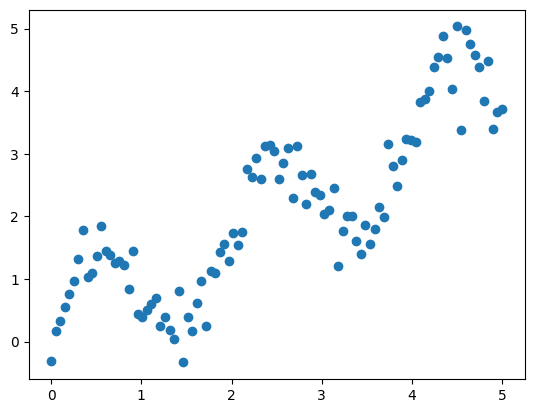

In [5]:
plt.scatter(x,y)

#### nonlinear

In [6]:
regr_lin = LinearRegression()

In [7]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [9]:
regr_lin.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


0.5211268101854314


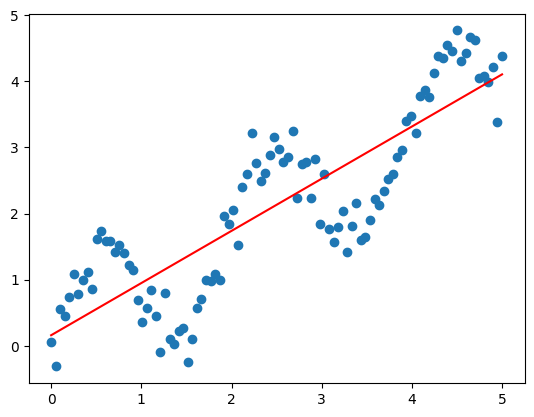

In [10]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [11]:
print(x.shape)

(100,)


In [16]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)


(100, 5)


In [17]:
regr_poly = LinearRegression()

In [18]:
regr_poly.fit(X_poly, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


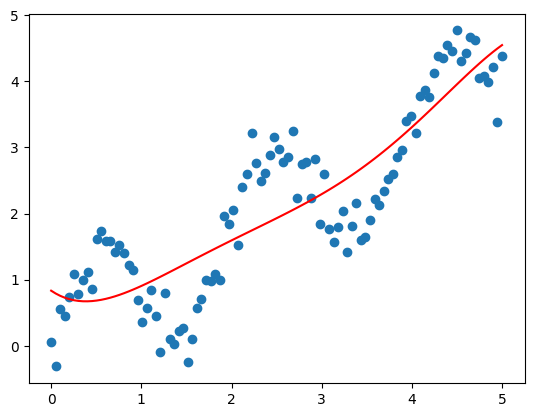

In [19]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')  #多項式曲線

In [20]:
print('Coefficients: ', regr_poly.coef_)  #[w1 w2 w3 w4 w5]
print('interception: ', regr_poly.intercept_)

Coefficients:  [-0.92636333  1.56857285 -0.70609155  0.14579511 -0.01079291]
interception:  0.8341417303547365


In [21]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b      #100*5 dot 5*1

array([0.83414173, 0.79126674, 0.75586125, 0.7274131 , 0.70543204,
       0.68944932, 0.67901725, 0.67370876, 0.67311703, 0.67685499,
       0.68455495, 0.69586816, 0.71046436, 0.72803141, 0.74827479,
       0.77091724, 0.7956983 , 0.82237389, 0.85071589, 0.8805117 ,
       0.91156385, 0.94368953, 0.9767202 , 1.01050112, 1.04489099,
       1.07976146, 1.11499675, 1.1504932 , 1.18615884, 1.22191299,
       1.25768583, 1.29341792, 1.32905988, 1.36457185, 1.39992314,
       1.43509179, 1.47006412, 1.50483433, 1.53940405, 1.57378196,
       1.60798331, 1.64202951, 1.67594775, 1.70977049, 1.74353512,
       1.77728348, 1.81106144, 1.8449185 , 1.87890736, 1.91308344,
       1.94750455, 1.98223038, 2.01732212, 2.05284201, 2.08885293,
       2.12541798, 2.16260003, 2.20046132, 2.23906301, 2.27846479,
       2.31872441, 2.35989728, 2.40203605, 2.44519016, 2.48940546,
       2.53472372, 2.58118226, 2.62881349, 2.6776445 , 2.72769663,
       2.77898507, 2.83151837, 2.88529809, 2.94031832, 2.99656

In [22]:
regr_poly.predict(X_poly)

array([0.83414173, 0.79126674, 0.75586125, 0.7274131 , 0.70543204,
       0.68944932, 0.67901725, 0.67370876, 0.67311703, 0.67685499,
       0.68455495, 0.69586816, 0.71046436, 0.72803141, 0.74827479,
       0.77091724, 0.7956983 , 0.82237389, 0.85071589, 0.8805117 ,
       0.91156385, 0.94368953, 0.9767202 , 1.01050112, 1.04489099,
       1.07976146, 1.11499675, 1.1504932 , 1.18615884, 1.22191299,
       1.25768583, 1.29341792, 1.32905988, 1.36457185, 1.39992314,
       1.43509179, 1.47006412, 1.50483433, 1.53940405, 1.57378196,
       1.60798331, 1.64202951, 1.67594775, 1.70977049, 1.74353512,
       1.77728348, 1.81106144, 1.8449185 , 1.87890736, 1.91308344,
       1.94750455, 1.98223038, 2.01732212, 2.05284201, 2.08885293,
       2.12541798, 2.16260003, 2.20046132, 2.23906301, 2.27846479,
       2.31872441, 2.35989728, 2.40203605, 2.44519016, 2.48940546,
       2.53472372, 2.58118226, 2.62881349, 2.6776445 , 2.72769663,
       2.77898507, 2.83151837, 2.88529809, 2.94031832, 2.99656

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [37]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [38]:
sigma = 0.3

In [51]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])

X_rbf

array([[2.49352209e-01, 3.72665317e-06, 8.32396968e-16, 2.77873902e-30,
        1.38634329e-49],
       [3.25472872e-01, 8.52574586e-06, 3.33776477e-15, 1.95292168e-29,
        1.70773187e-48],
       [4.12959721e-01, 1.89599467e-05, 1.30098499e-14, 1.33417628e-28,
        2.04484269e-47],
       [5.09321387e-01, 4.09857759e-05, 4.92924229e-14, 8.85998378e-28,
        2.38007940e-46],
       [6.10614979e-01, 8.61232743e-05, 1.81542941e-13, 5.71931425e-27,
        2.69286330e-45],
       [7.11597342e-01, 1.75913523e-04, 6.49934950e-13, 3.58877569e-26,
        2.96161426e-44],
       [8.06106646e-01, 3.49276399e-04, 2.26178717e-12, 2.18897091e-25,
        3.16616832e-43],
       [8.87650512e-01, 6.74109702e-04, 7.65111808e-12, 1.29785145e-24,
        3.29026462e-42],
       [9.50129573e-01, 1.26468753e-03, 2.51587693e-11, 7.47999499e-24,
        3.32367827e-41],
       [9.88587205e-01, 2.30636063e-03, 8.04165068e-11, 4.19052994e-23,
        3.26361145e-40],
       [9.99858301e-01, 4.0884

In [40]:
regr_rbf = LinearRegression()

In [42]:
regr_rbf.fit(X_rbf, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


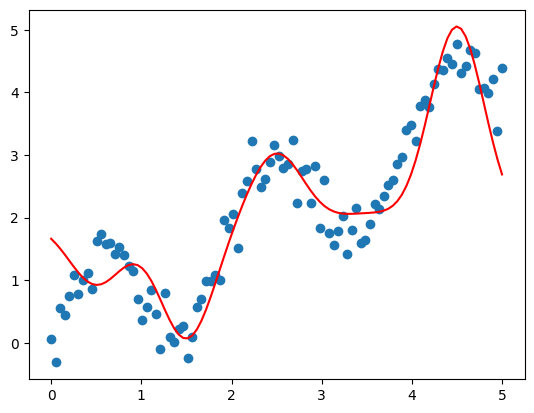

In [43]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [44]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.97217914 -1.83675407  1.12642387  0.15226199  3.14733232]
interception:  1.9052369714758595


#### Comparison

In [46]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

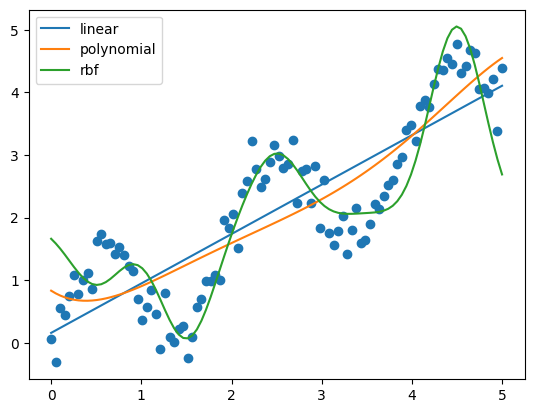

In [47]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [48]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5211268101854314


In [49]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.4718406676396355


In [50]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.26588083916937677
